# Objective : To predict the average price of avacados and to predict the region from where they belong.

In this task we need to predict both average price and regions of avacados which means both regression and classification is to be used on this dataset.

#### 1. Taking target feature as average price and applying regression model on it.

#### Importing various libraries necessary for this task to be completed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
ava = pd.read_csv('./Downloads/avocado.csv')

In [3]:
ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
ava.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

As we can observe by looking at the columns name there are three columns with only numbers in them. These must be Product Lookup codes (PLU's) given in the questions.

#### Now we need to check dimensions, description and pressence of null values in the dataset

In [5]:
ava.shape

(18249, 14)

In [6]:
ava.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
ava.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From the above we can conclude this about dataset :
* dataset has 18249 rows and 14 columns
* description of the data is giving mean, max value, min value, etc of each column of the dataset who has continuous data in them.
* There is pressence of no null values in the dataset.

#### EDA
1. Unnamed: 0

In [8]:
ava['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

By observing this columns value we can conclude that it comes out as an index and does not has effect on the target feature in anyway. So we can drop it.

In [9]:
ava.drop(['Unnamed: 0'], axis= 1, inplace= True)

2. Date

In [10]:
ava['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

We can extract the information of year from this column as it will be easier to plot graphs from that information but that information has already been given in dataset and this column doesn't seem to have any further use other than the extraction of the year information. So we can drop this column too.

In [11]:
ava.drop(['Date'], axis= 1, inplace= True)

3. Total Volume

In [12]:
ava['Total Volume'].unique()

array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

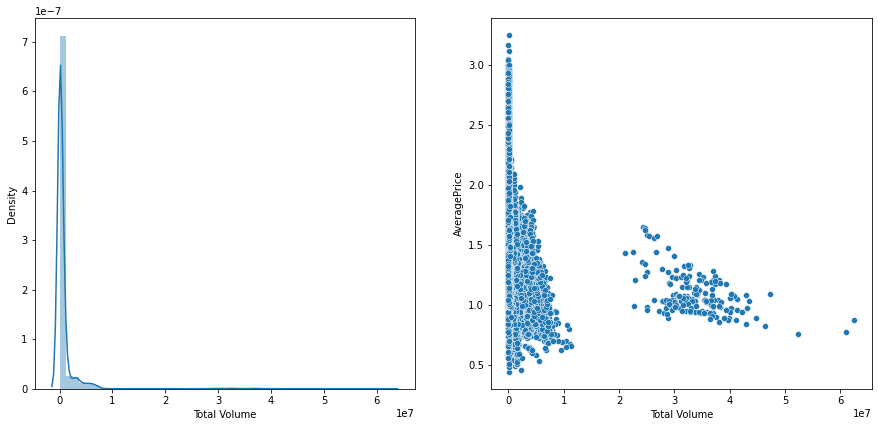

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['Total Volume'])
plt.xlabel('Total Volume')
plt.subplot(222)
sns.scatterplot(x= 'Total Volume', y= 'AveragePrice', data= ava)
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of Total Volume we can conclude that data is positively skewed from the distplot and from the scatter plot we can conclude that average price is high where Total Volume is near to zero and also data is not scattered but is making almost 2 piles in the plot.

4. 4046 (Product Lookup Code)

In [14]:
ava['4046'].unique()

array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

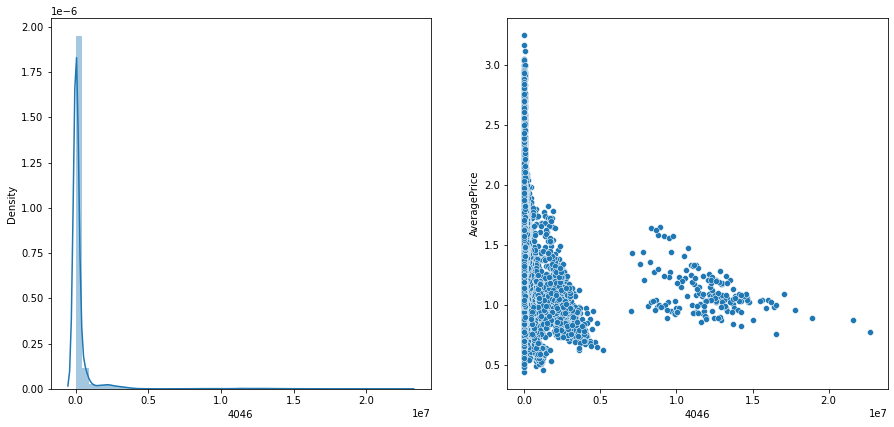

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['4046'])
plt.xlabel('4046')
plt.subplot(222)
sns.scatterplot(x= '4046', y= 'AveragePrice', data= ava)
plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of 4046 we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place and is making 2 piles in the scatterplot.

5. 4225 (Product Lookup Code)

In [16]:
ava['4225'].unique()

array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

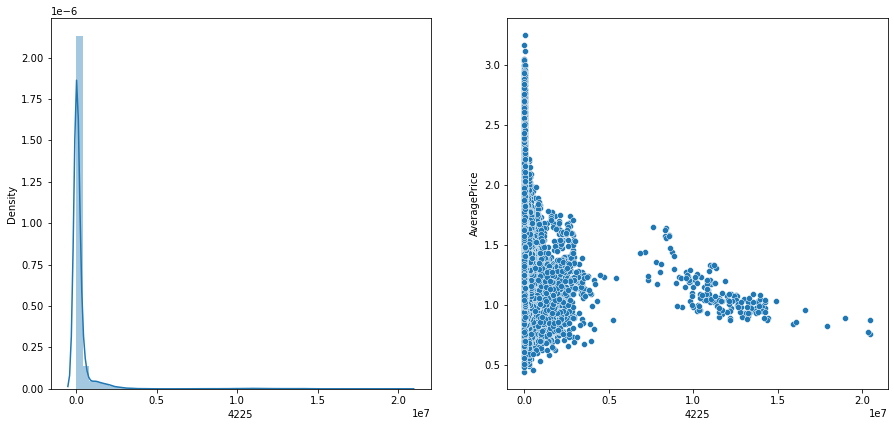

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['4225'])
plt.xlabel('4225')
plt.subplot(222)
sns.scatterplot(x= '4225', y= 'AveragePrice', data= ava)
plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of 4225 we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place and is making 2 piles in the scatterplot.

7. 4770 (Product Lookup Code)

In [18]:
ava['4770'].unique()

array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

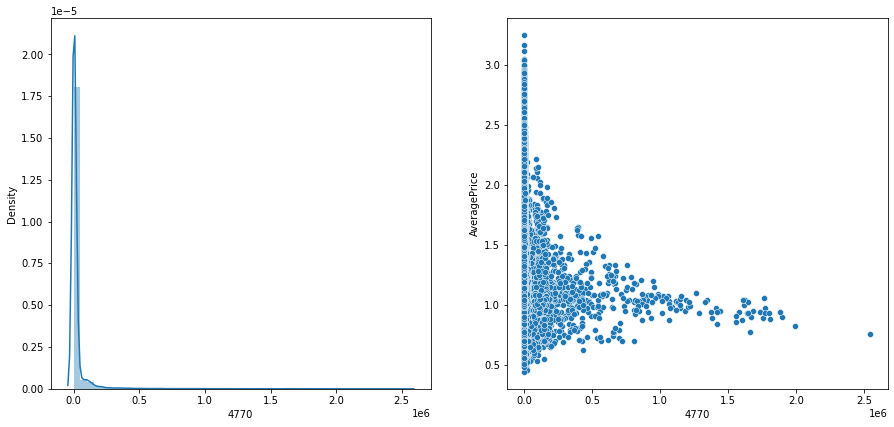

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['4770'])
plt.xlabel('4770')
plt.subplot(222)
sns.scatterplot(x= '4770', y= 'AveragePrice', data= ava)
plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of 4770 we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place in the scatterplot.

8. Total Bags

In [20]:
ava['Total Bags'].unique()

array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

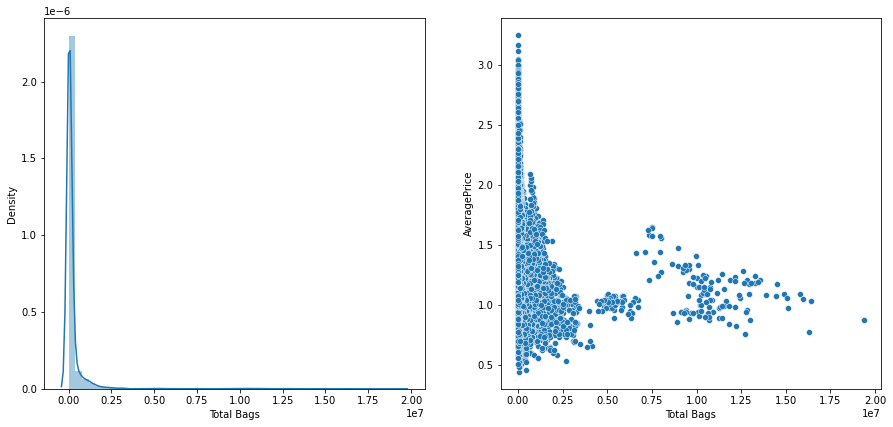

In [21]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['Total Bags'])
plt.xlabel('Total Bags')
plt.subplot(222)
sns.scatterplot(x= 'Total Bags', y= 'AveragePrice', data= ava)
plt.xlabel('Total Bags')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of Total Bags we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place and is making 2 piles in the scatterplot.

9. Small Bags

In [22]:
ava['Small Bags'].unique()

array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

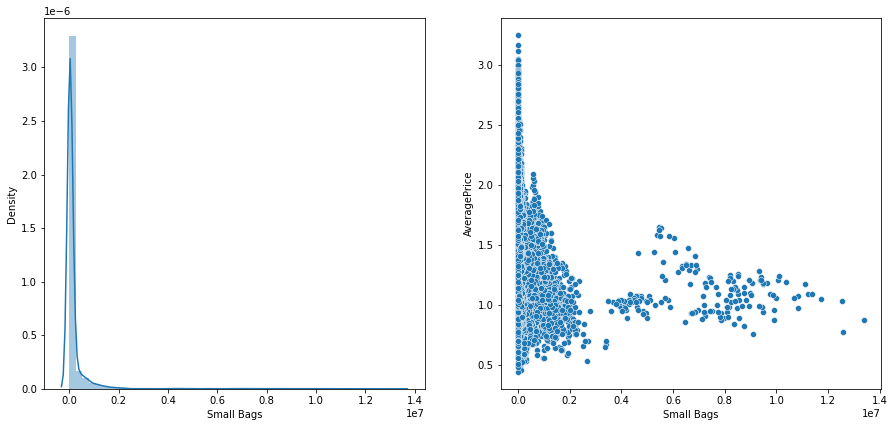

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['Small Bags'])
plt.xlabel('Small Bags')
plt.subplot(222)
sns.scatterplot(x= 'Small Bags', y= 'AveragePrice', data= ava)
plt.xlabel('Small Bags')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of Small Bags we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place and is making 2 piles in the scatterplot.

10. Large Bags

In [24]:
ava['Large Bags'].unique()

array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

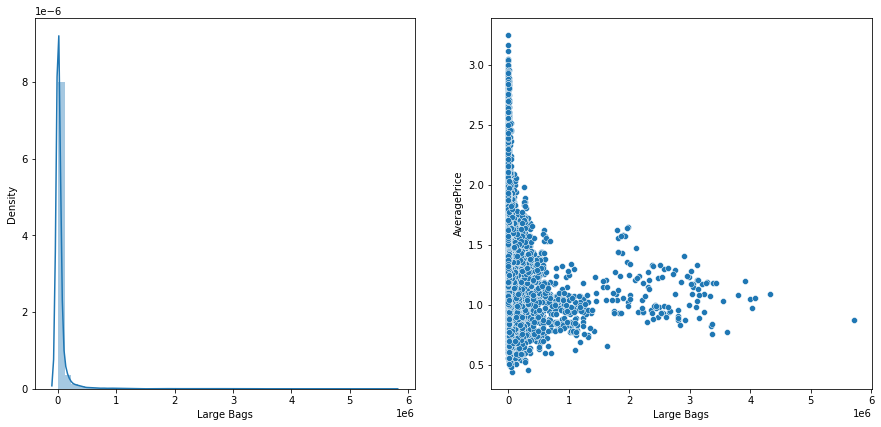

In [25]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['Large Bags'])
plt.xlabel('Large Bags')
plt.subplot(222)
sns.scatterplot(x= 'Large Bags', y= 'AveragePrice', data= ava)
plt.xlabel('Large Bags')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of Large Bags we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place in the scatterplot.

11. XLarge Bags 

In [26]:
ava['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

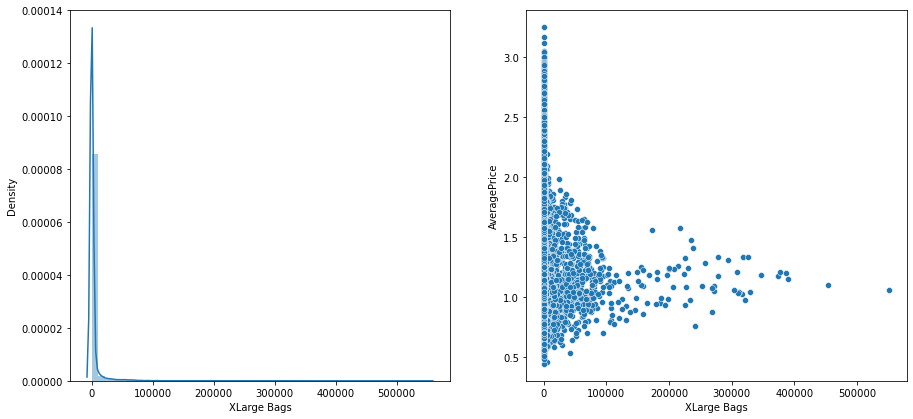

In [27]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(ava['XLarge Bags'])
plt.xlabel('XLarge Bags')
plt.subplot(222)
sns.scatterplot(x= 'XLarge Bags', y= 'AveragePrice', data= ava)
plt.xlabel('XLarge Bags')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of XLarge Bags we can conclude that data is positive skewed from the distplot and from the scatterplot we can conclude that data near 0 has highest AveragePrice and data is showing somewhat negative correlation with AveragePrice. Also data is not scattered all over the place in the scatterplot.

12. Type

In [29]:
ava['type'].unique()

array(['conventional', 'organic'], dtype=object)

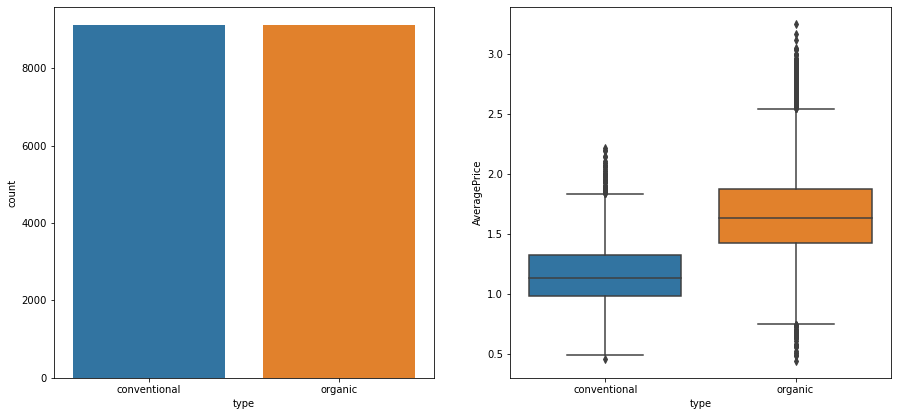

In [31]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(ava['type'])
plt.xlabel('type')
plt.subplot(222)
sns.boxplot(x= 'type', y= 'AveragePrice', data= ava)
plt.xlabel('type')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of type we can conclude that both type of avacados are sold of same amount from the countplot and from the boxplot we can conclude that outliers are present in both type of avacados.

13. year

In [32]:
ava['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

From the above we can conclude that highest Average price is from year 2017 which means most number avacados were sold in year 2017. Now we plot the graph.

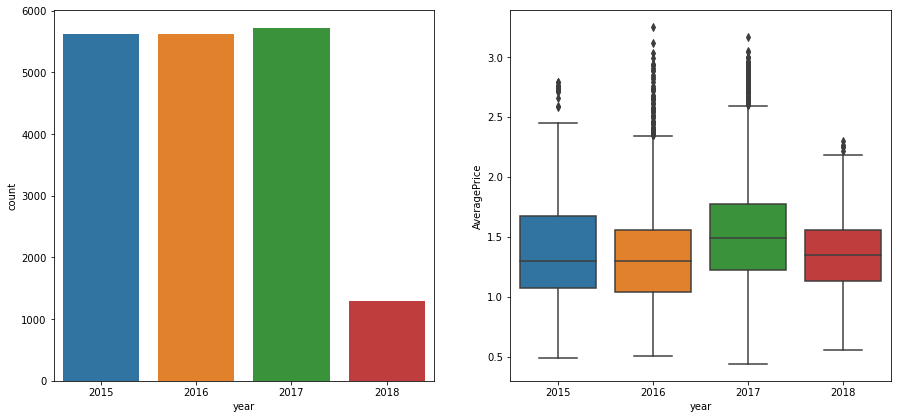

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(ava['year'])
plt.xlabel('year')
plt.subplot(222)
sns.boxplot(x= 'year', y= 'AveragePrice', data= ava)
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graph of year we can conclude that most number of avacados were sold in year 2017 from the countplot and from the boxplot we can conclude that outliers are present in all the years present in the dataset.

14. region

In [37]:
ava['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [39]:
ava.groupby(['region'])['AveragePrice'].mean()

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

By looking at groupby of region column of AveragePrice we can conclude that most number of avacados were sold in NewYork Region. Now we plot the graph

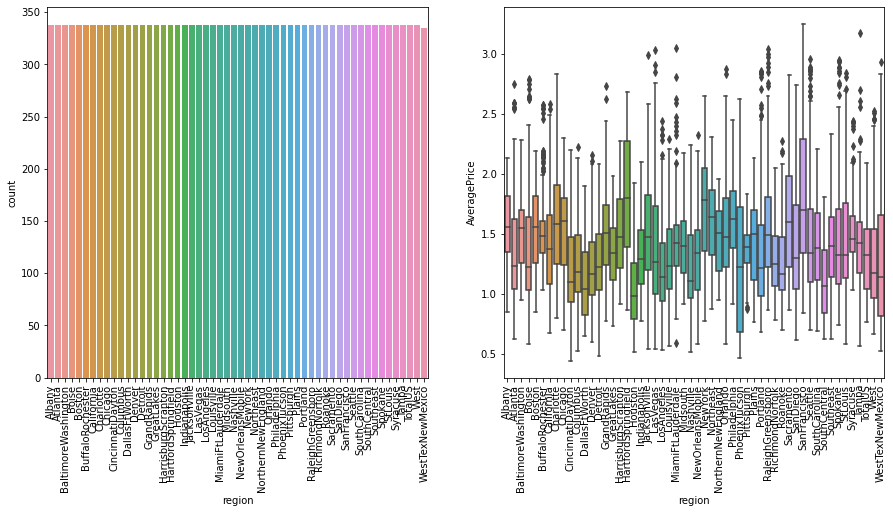

In [41]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(ava['region'])
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'region', y= 'AveragePrice', data= ava)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of region we can conclude that in most of the regions avacado sales are almost same except WestTexNewMexico which has slightly less sales from the countplot and from the boxplot we can conclude that out of 54 regions 23 regions have outliers present in them.

#### Checking the data types of every column present in dataset.

In [42]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Changing every columns data type into int or float for correlation in heatmap.

In [43]:
ava['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [44]:
ava['type'] = ava['type'].replace(['conventional', 'organic'],[0,1])

In [45]:
ava['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [46]:
ava['region'] = ava['region'].replace(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
                                       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
                                       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
                                       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
                                       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
                                       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
                                       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
                                       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
                                       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
                                       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
                                       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
                                       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
                                       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], np.arange(0,54))

In [49]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(2)
memory usage: 1.6 MB


#### Now we plot the heatmap to check for the multicollinearity.

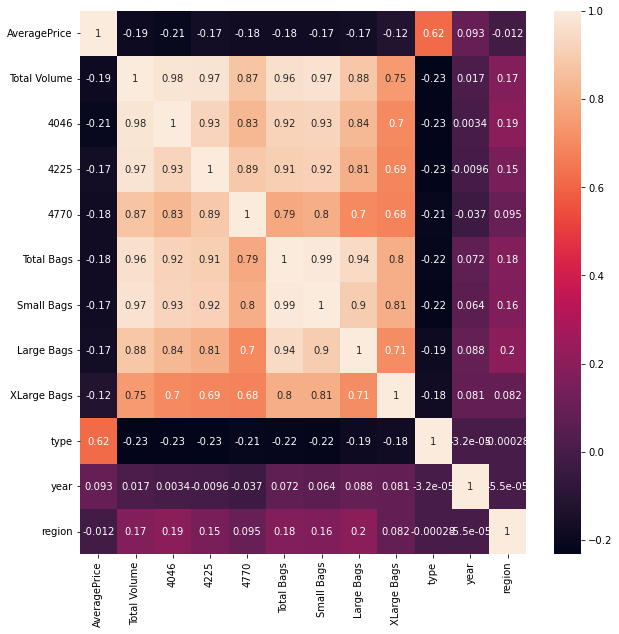

In [50]:
plt.figure(figsize= [10,10])
sns.heatmap(ava.corr(), annot= True)
plt.show()

By looking at heatmap we observe that target feature (AveragePrice) has high correlation with only type feature and has high negative correlation with Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags features. we can drop the region column as it has low positive correlation with target feature and also has high correaltion with other features. year column also has low positive correlation with target feature but it also low positive correlation with other features also. So we reach to this conclusion that we can drop the region column to make data more refined.

In [51]:
ava.drop(['region'], axis= 1, inplace= True)

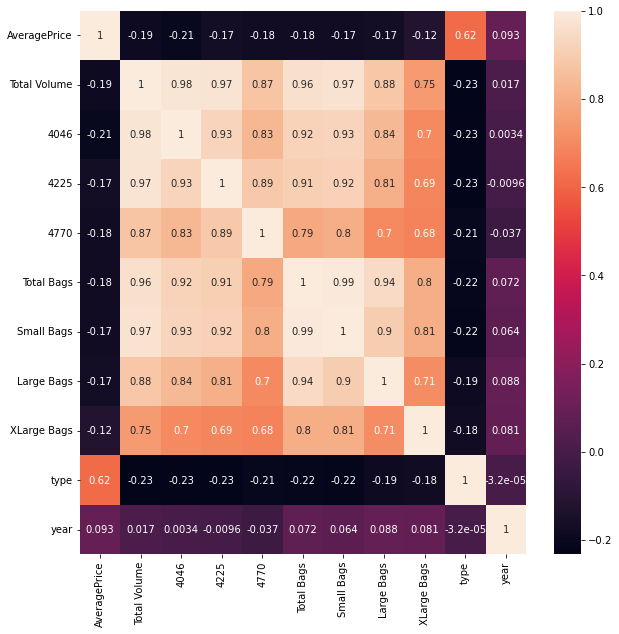

In [52]:
plt.figure(figsize= [10,10])
sns.heatmap(ava.corr(), annot= True)
plt.show()

As we can see that data has become more refined than previous.

#### Now we need to search for the best suited model.

In [53]:
X = ava.drop(['AveragePrice'], axis= 1)
y = ava['AveragePrice']

1. Linear Regression Model

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
lr = LinearRegression()
trainaccuracy = []
testaccuracy = []
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lr.fit(scaledX_train, y_train)
    trainaccuracy.append(lr.score(scaledX_train, y_train))
    testaccuracy.append(lr.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.40659724802604413
test accuracy :  0.40583059379160974


2. Decision Tree Regression Model

In [56]:
dt = DecisionTreeRegressor()
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dt.fit(scaledX_train, y_train)
    trainaccuracy.append(dt.score(scaledX_train, y_train))
    testaccuracy.append(dt.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.7032986240130221
test accuracy :  0.5081578369568421


3. Random Forest Regression Model

In [57]:
rf = RandomForestRegressor()
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rf.fit(scaledX_train, y_train)
    trainaccuracy.append(rf.score(scaledX_train, y_train))
    testaccuracy.append(rf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.7931436980100389
test accuracy :  0.6078080994012481


4. Bagging Regression model

In [58]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor())
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    br.fit(scaledX_train, y_train)
    trainaccuracy.append(br.score(scaledX_train, y_train))
    testaccuracy.append(br.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8349996616014705
test accuracy :  0.6520407400291685


#### By looking at all the model we can conclude that Bagging Regression model is giving the best score out of all four models, so, now we need to apply it on the model to make predictions.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 100)

In [78]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor())

In [79]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [80]:
pred = br.fit(scaledX_train, y_train).predict(scaledX_test)

In [82]:
print('r2_score : ', metrics.r2_score(y_test, pred))

r2_score :  0.7828338914839332


In [84]:
print('rmse score : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

rmse score :  0.18906325679119448


In [85]:
print('mae score : ', np.sqrt(metrics.mean_absolute_error(y_test, pred)))

mae score :  0.3581856869018775


#### By looking at above metrics for the model we can conclude that it is working well on the dataset and now we need to save the model.

In [86]:
import pickle

In [87]:
save_r = pickle.dumps(br)

#### 2. Taking target feature as region and applying Logistic regression (classification) on it.

#### Importing various libraries necessary for this task.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [3]:
av = pd.read_csv('./Downloads/avocado.csv')

In [4]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


we have already checked the dimensions, description and pressence of null values in above. So there is no need to do that s we know that there is no null values present in it.

#### EDA

1. Unnamed: 0

As we have discussed above we already know that this feature is sort of index and we can already drop it.

In [5]:
av.drop(['Unnamed: 0'], axis= 1, inplace= True)

2. Date

As we have discussed above we already know that the only information we can extract from this column is year to make information more refine to do something. So we can drop this column.

In [6]:
av.drop(['Date'], axis= 1, inplace= True)

3. AveragePrice

In [7]:
av['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

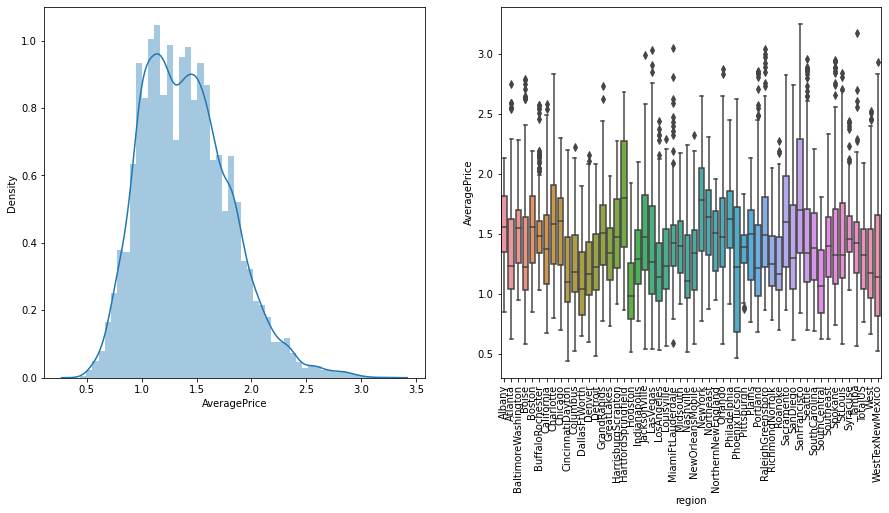

In [8]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['AveragePrice'])
plt.xlabel('AveragePrice')
plt.subplot(222)
sns.boxplot(x= 'region', y= 'AveragePrice', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('AveragePrice')
plt.show()

By looking at both the graphs of AveragePrice we can conclude that data is positively skewed with having highest density around 1.2 and also plot line is showing 2 peaks from the distplot and from boxplot we can conclude that outliers are present in 24 regions out of 54 regions.

4. Total Volume

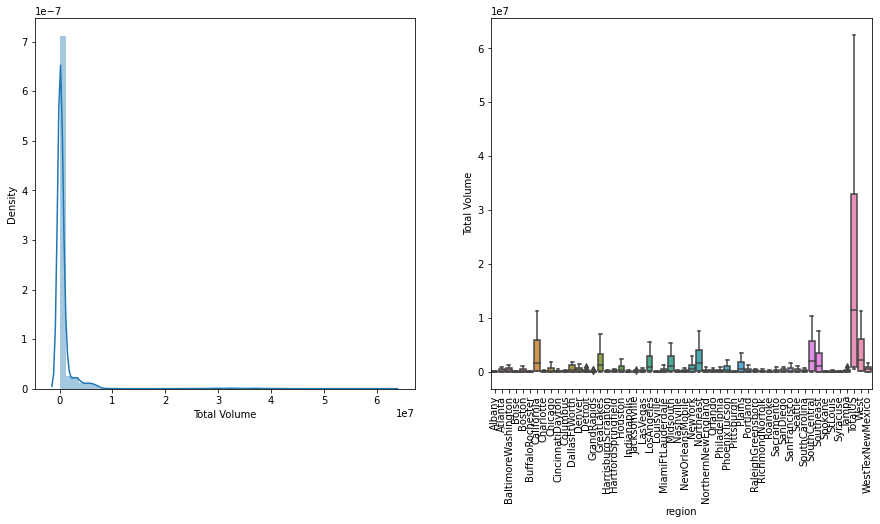

In [9]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['Total Volume'])
plt.xlabel('Total Volume')
plt.subplot(222)
sns.boxplot(x= 'region', y= 'Total Volume', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('Total Volume')
plt.show()

By looking at both the graphs of Total Volume we can conclude that data is positvely skewed from the distplot and from boxplot we can conclude that there are no outliers present in any of the regions present in there.

5. 4046 (Product Lookup Code)

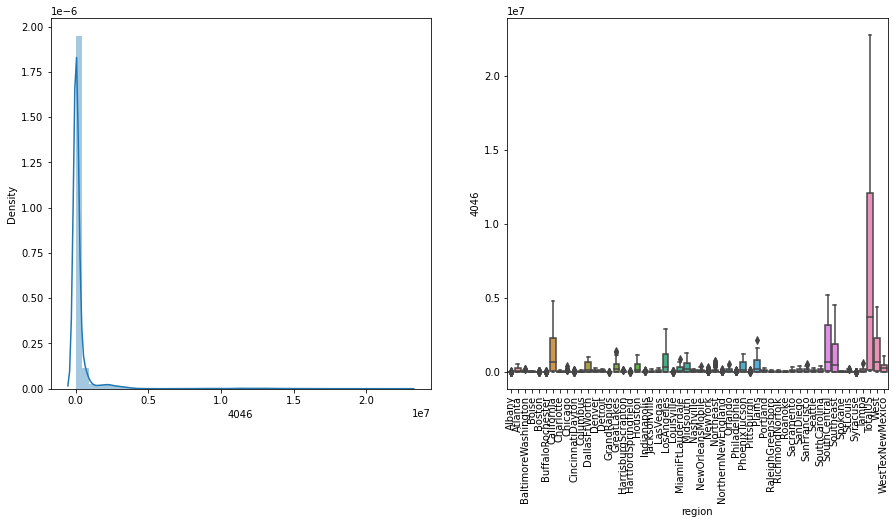

In [10]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['4046'])
plt.xlabel('4046')
plt.subplot(222)
sns.boxplot(x= 'region', y= '4046', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('4046')
plt.show()

By looking at both the graphs of 4046 we can conclude that data is positively skewed from the distplot and from the boxplot we can conclude that outliers are present in 25 regions out of 54 regions present in it.

6. 4225 (Product Lookup Code)

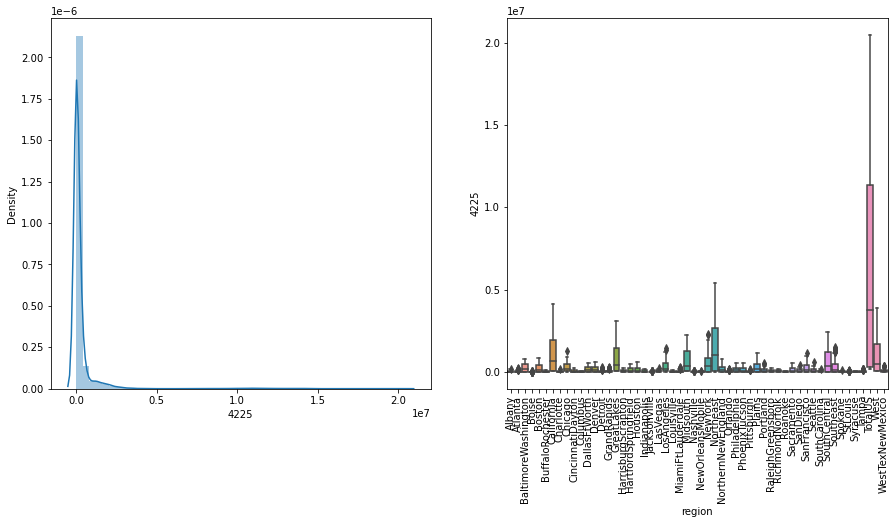

In [11]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['4225'])
plt.xlabel('4225')
plt.subplot(222)
sns.boxplot(x= 'region', y= '4225', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('4225')
plt.show()

By looking at both the graphs of 4225 we can conclude that data is positively skewed from the distplot and from the boxplot we can conclude that outliers are present in 25 regions out of total 54 regions in it.

7. 4770 (Product Lookup Code)

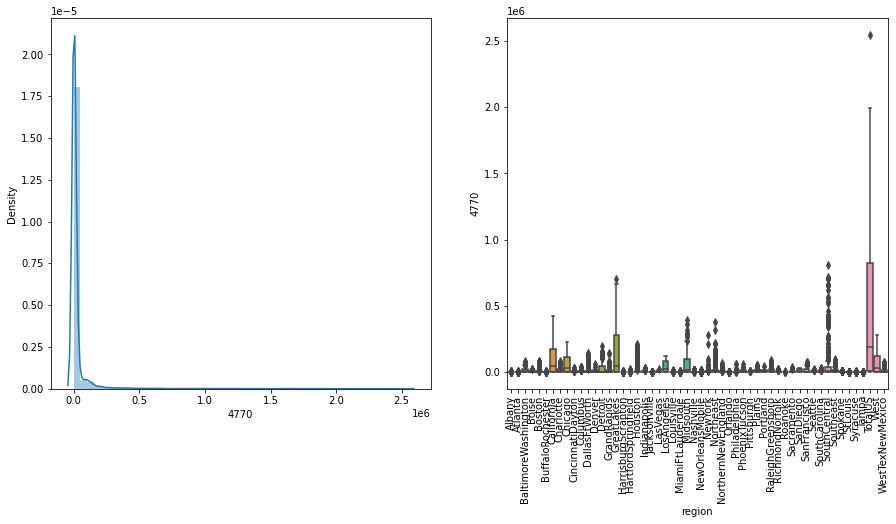

In [12]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['4770'])
plt.xlabel('4770')
plt.subplot(222)
sns.boxplot(x= 'region', y= '4770', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('4770')
plt.show()

By looking at both the graphs of 4770 we can conclude that data is positively skewed from the distplot and from the boxplot we can conclude that outliers are present in 48 regions out of total 54 regions in it.

8.Total Bags

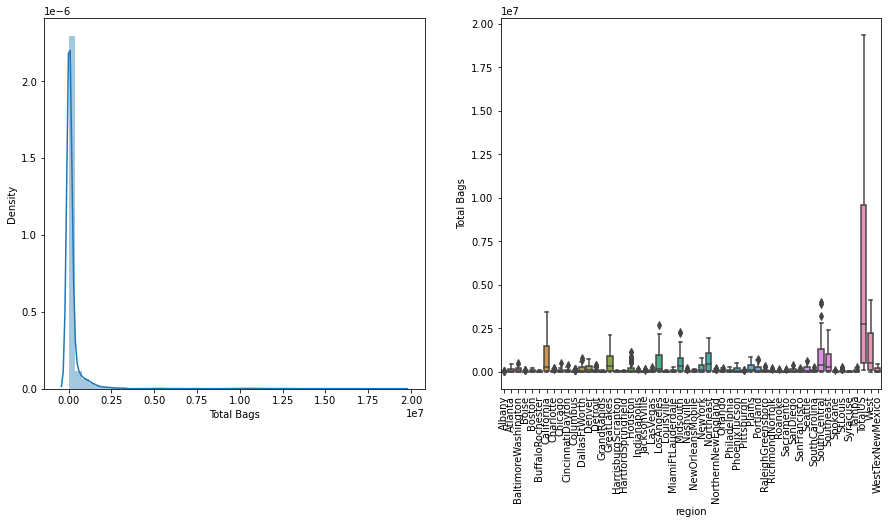

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['Total Bags'])
plt.xlabel('Total Bags')
plt.subplot(222)
sns.boxplot(x= 'region', y= 'Total Bags', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('Total Bags')
plt.show()

By looking at both the graphs of Total Bags we can conclude that data is positively skewed from the distplot and from the boxplot we can conclude that outliers are present in 32 regions out of total 54 regions in it.

9. Small Bags

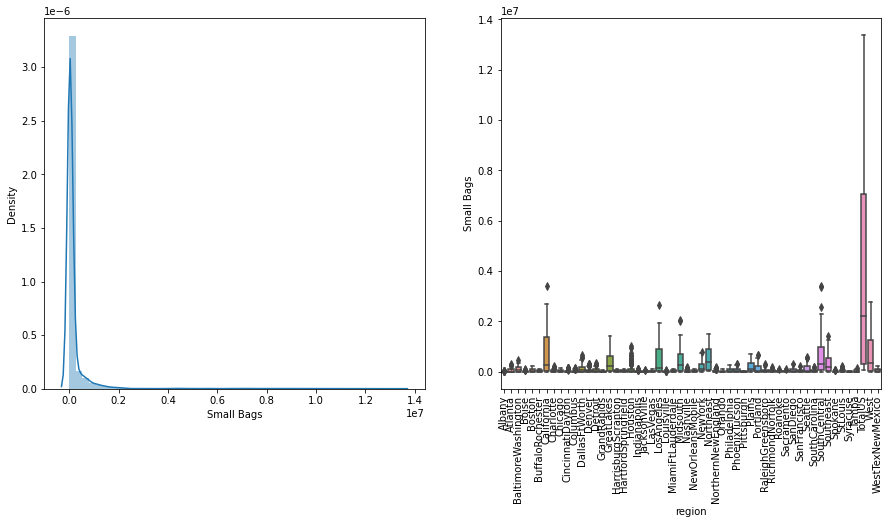

In [14]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['Small Bags'])
plt.xlabel('Small Bags')
plt.subplot(222)
sns.boxplot(x= 'region', y= 'Small Bags', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('Small Bags')
plt.show()

By looking at both the graphs of Small Bags we can conclude that data is positively skewed from the distplot and from the boxplot we can conclude that outliers present in 35 regions out of total 54 regions present in it.

10. Large Bags

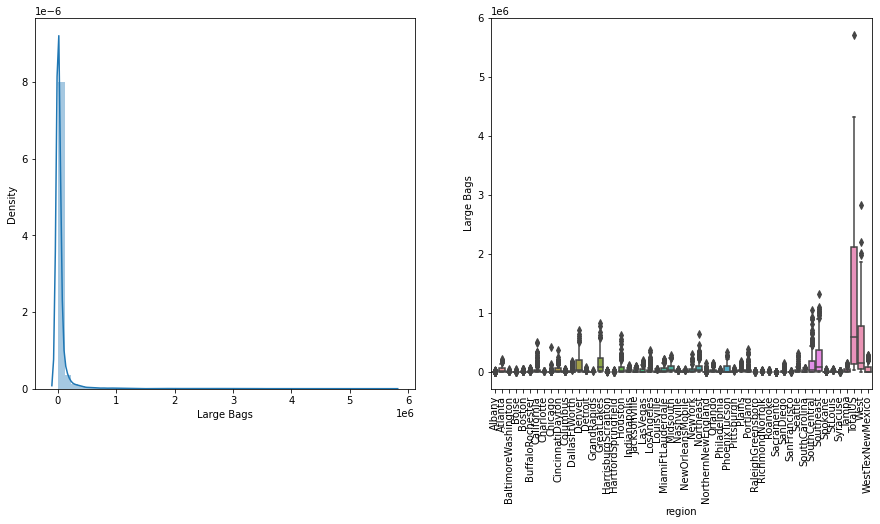

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['Large Bags'])
plt.xlabel('Large Bags')
plt.subplot(222)
sns.boxplot(x= 'region', y= 'Large Bags', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('Large Bags')
plt.show()

By looking at both the graphs of Large Bags we can conclude that data is positively skewed from the distplot and from the boxplot we can conclude that outliers are present in all the regions present in it.

11. XLarge Bags

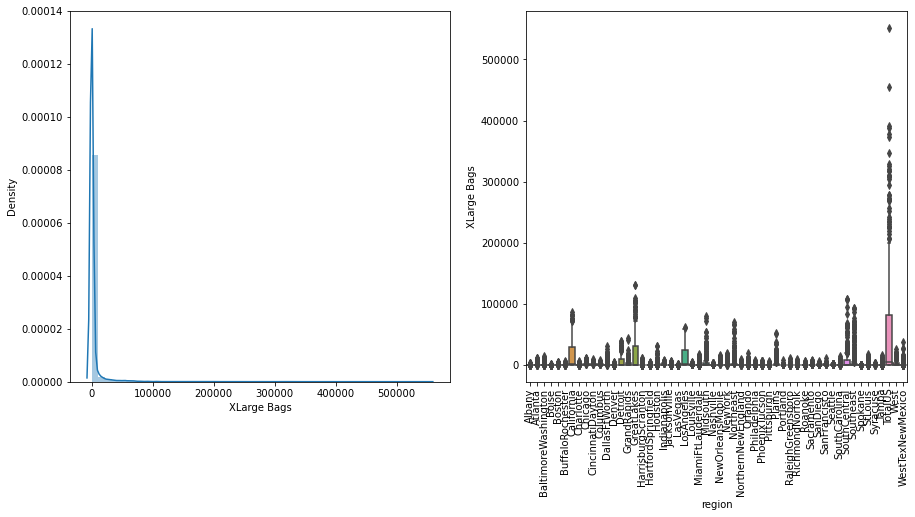

In [16]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(av['XLarge Bags'])
plt.xlabel('XLarge Bags')
plt.subplot(222)
sns.boxplot(x= 'region', y= 'XLarge Bags', data= av)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('XLarge Bags')
plt.show()

By looking at both the graphs of XLarge Bags we can conclude that data is positively skewed from the distplot and from the scatterplot we can conclude that outliers are present in all the regions present in it.

12. type

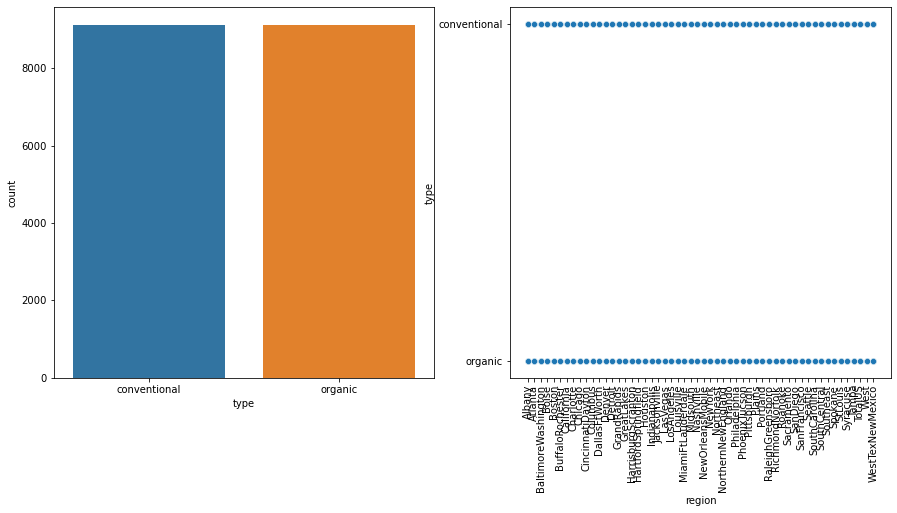

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(av['type'])
plt.xlabel('type')
plt.subplot(222)
sns.scatterplot(x= 'region', y= 'type', data= av,)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('type')
plt.show()

By looking at both the graphs of type we can conclude that both type of avacados were sold in equal quantity from the countplot and from the scatterplot we can conclude that both type of avacados were sold in all regions.

13. year

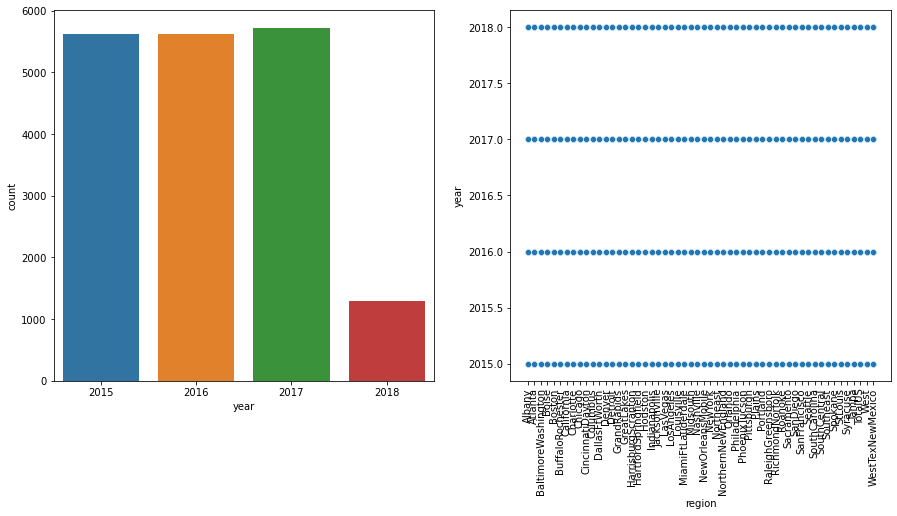

In [18]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(av['year'])
plt.xlabel('year')
plt.subplot(222)
sns.scatterplot(x= 'region', y= 'year', data= av,)
plt.xlabel('region')
plt.xticks(rotation= 90)
plt.ylabel('year')
plt.show()

By looking at both the graphs of year we can conclude that in year 2017 most avacados were sold from the countplot and from the scatterplot we can conclude that sales of avacados were occuring in every year mentioned in the plot.

#### Now changing the data types of every column to float or int data type.

In [19]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
av['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [21]:
av['type'] = av['type'].replace(['conventional', 'organic'],[0,1])

#### We don't need to create heatmap as target feature is a categorical feature. So, Now we need to check various models performance for the dataset and to choose the model with the best performance.

1. Logistic Regression model

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X = av.drop(['region'], axis= 1)
y = av['region']

In [34]:
lr = LogisticRegression()
trainaccuracy = []
testaccuracy = []
for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lr.fit(scaledX_train, y_train)
    trainaccuracy.append(lr.score(scaledX_train, y_train))
    testaccuracy.append(lr.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.34407172163552313
Test accuracy :  0.328351913557393


2. Decision Train classification model

In [35]:
dtc = DecisionTreeClassifier(criterion= 'entropy')
for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtc.fit(scaledX_train, y_train)
    trainaccuracy.append(dtc.score(scaledX_train, y_train))
    testaccuracy.append(dtc.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.6720358608177615
Test accuracy :  0.5633001951723413


3. Random Forest Classification Model

In [29]:
trainaccuracy = []
testaccuracy = []
rfc = RandomForestClassifier(criterion= 'entropy')
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rfc.fit(scaledX_train, y_train)
    trainaccuracy.append(rfc.score(scaledX_train, y_train))
    testaccuracy.append(rfc.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.9999992092523797
Test accuracy :  0.9026207278262073


In [30]:
brc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    brc.fit(scaledX_train, y_train)
    trainaccuracy.append(brc.score(scaledX_train, y_train))
    testaccuracy.append(brc.score(scaledX_test, y_test))
print('Train accuracy : ', np.mean(trainaccuracy))
print('Test accuracy : ', np.mean(testaccuracy))

Train accuracy :  0.9972209174886487
Test accuracy :  0.8799354273326875


##### By looking at performance of all the models we can conclude that best model suited for this dataset is Random Forest Classification model. So now we need to apply it on the dataset.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 1)

In [32]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test =scaler.transform(X_test)

In [33]:
rfc = RandomForestClassifier(criterion= 'entropy')

In [34]:
pre = rfc.fit(scaledX_train, y_train).predict(scaledX_test)

#### Now checking the performance of the model by applying various metrics

In [35]:
print('Accuracy Score : ', metrics.accuracy_score(y_test, pre))

Accuracy Score :  0.9081278538812786


In [36]:
print('Cohen Kappa score : ', metrics.cohen_kappa_score(y_test, pre)) 

Cohen Kappa score :  0.9063865551931553


In [37]:
print('Confusion matrix : ')
metrics.confusion_matrix(y_test, pre)

Confusion matrix : 


array([[ 82,   0,   0, ...,   0,   0,   0],
       [  0,  97,   0, ...,   0,   0,   1],
       [  0,   0, 111, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 109,   0,   0],
       [  0,   0,   0, ...,   0,  97,   0],
       [  0,   1,   0, ...,   0,   0, 101]], dtype=int64)

#### By looking at all the metrics used above for the model, it is safe to say that Random Forest Classification model is best suited model for this data set. Now we save the model.

In [42]:
import pickle

In [43]:
save_c = pickle.dumps(rfc)

#### Hence Dataset hasbeen solved in both regression and classification way and we can conclude that classification model is giving the high performance score (0.9063) compare to regression model performance score (0.7828). So the objective for the task hasbeen achieved.